In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import traceback
import datetime
from datetime import timedelta

In [2]:
# 데이터 분석 기본 라이브러리 관련
import os
import sys
import platform
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

# EDA 관련
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import missingno as msno

# 데이터 전처리 관련
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.style.use('ggplot')

current_os = platform.platform().split("-")[0]
if current_os == 'Windows':
    print(f'현재 사용되는 운영체제: {current_os}')
    plt.rc('font', family='Malgun Gothic') # For Windows
    plt.rc("axes",unicode_minus=False)
elif current_os == 'Darwin': # macOS
    print(f"본 내용은 Windows 환경에서 분석됐습니다. 다른 OS로 하시게 될 경우 에러가 날 수 있습니다.")
    plt.rc('font', family='AppleGothic') # For Windows

현재 사용되는 운영체제: Windows


In [4]:
삼성전자=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/삼성전자.csv',encoding='cp949')
SK하이닉스=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/SK하이닉스.csv',encoding='cp949')
NAVER=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/NAVER.csv',encoding='cp949')
씨젠=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/씨젠.csv',encoding='cp949')
우리들휴브레인=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/우리들휴브레인.csv',encoding='cp949')
현대차=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/현대차.csv',encoding='cp949')
DGB금융지주=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/DGB금융지주.csv',encoding='cp949')
미스터블루=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/미스터블루.csv',encoding='cp949')
셀트리온=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/셀트리온.csv',encoding='cp949')
데일리블록체인=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/데일리블록체인.csv',encoding='cp949')
소리바다=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/소리바다.csv',encoding='cp949')
한화솔루션=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/한화솔루션.csv',encoding='cp949')
아모레퍼시픽=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/아모레퍼시픽.csv',encoding='cp949')
CJ대한통운=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/CJ대한통운.csv',encoding='cp949')
GS건설=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/GS건설.csv',encoding='cp949')

In [5]:
삼성전자.index=삼성전자['날짜']
SK하이닉스.index=SK하이닉스['날짜']
NAVER.index=NAVER['날짜']
씨젠.index=씨젠['날짜']
우리들휴브레인.index=우리들휴브레인['날짜']
현대차.index=현대차['날짜']
DGB금융지주.index=DGB금융지주['날짜']
미스터블루.index=미스터블루['날짜']
셀트리온.index=셀트리온['날짜']
데일리블록체인.index=데일리블록체인['날짜']
소리바다.index=소리바다['날짜']
한화솔루션.index=한화솔루션['날짜']
아모레퍼시픽.index=아모레퍼시픽['날짜']
CJ대한통운.index=CJ대한통운['날짜']
GS건설.index=GS건설['날짜']

In [6]:
DATE=SK하이닉스[['날짜']]
DATE.index=DATE['날짜']

In [7]:
NAVER=pd.merge(NAVER,DATE,left_index=True,right_index=True,how='outer')
씨젠=pd.merge(씨젠,DATE,left_index=True,right_index=True,how='outer')
우리들휴브레인=pd.merge(우리들휴브레인,DATE,left_index=True,right_index=True,how='outer')
DGB금융지주=pd.merge(DGB금융지주,DATE,left_index=True,right_index=True,how='outer')
미스터블루=pd.merge(미스터블루,DATE,left_index=True,right_index=True,how='outer')
셀트리온=pd.merge(셀트리온,DATE,left_index=True,right_index=True,how='outer')
데일리블록체인=pd.merge(데일리블록체인,DATE,left_index=True,right_index=True,how='outer')
소리바다=pd.merge(소리바다,DATE,left_index=True,right_index=True,how='outer')
아모레퍼시픽=pd.merge(아모레퍼시픽,DATE,left_index=True,right_index=True,how='outer')
CJ대한통운=pd.merge(CJ대한통운,DATE,left_index=True,right_index=True,how='outer')

In [8]:
삼성전자

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,
2000.01.04,2000.01.04,305500.0,39500.0,300000.0,305500.0,283000.0,1483967.0
2000.01.05,2000.01.05,279000.0,26500.0,290000.0,303000.0,276000.0,1493604.0
2000.01.06,2000.01.06,281000.0,2000.0,287500.0,289000.0,279000.0,1087810.0
2000.01.07,2000.01.07,277000.0,4000.0,278000.0,283500.0,268000.0,806195.0
2000.01.10,2000.01.10,288500.0,11500.0,280000.0,288500.0,279000.0,937615.0
...,...,...,...,...,...,...,...
2020.10.27,2020.10.27,59800.0,600.0,60300.0,60300.0,59500.0,17260416.0
2020.10.28,2020.10.28,59000.0,800.0,59400.0,59400.0,58800.0,14428882.0
2020.10.29,2020.10.29,58100.0,900.0,58200.0,58500.0,57500.0,22636966.0


In [9]:
삼성전자=삼성전자[(삼성전자.index>='2013-01-01') & (삼성전자.index<'2019-12-31')] 
SK하이닉스=SK하이닉스[(SK하이닉스.index>='2013-01-01') & (SK하이닉스.index<'2019-12-31')] 
NAVER=NAVER[(NAVER.index>='2013-01-01') & (NAVER.index<'2019-12-31')] 
씨젠=씨젠[(씨젠.index>='2013-01-01') & (씨젠.index<'2019-12-31')] 
우리들휴브레인=우리들휴브레인[(우리들휴브레인.index>='2013-01-01') & (우리들휴브레인.index<'2019-12-31')] 
현대차=현대차[(현대차.index>='2013-01-01') & (현대차.index<'2019-12-31')] 
DGB금융지주=DGB금융지주[(DGB금융지주.index>='2013-01-01') & (DGB금융지주.index<'2019-12-31')] 
미스터블루=미스터블루[(미스터블루.index>='2013-01-01') & (미스터블루.index<'2019-12-31')] 
셀트리온=셀트리온[(셀트리온.index>='2013-01-01') & (셀트리온.index<'2019-12-31')] 
데일리블록체인=데일리블록체인[(데일리블록체인.index>='2013-01-01') & (데일리블록체인.index<'2019-12-31')] 
소리바다=소리바다[(소리바다.index>='2013-01-01') & (소리바다.index<'2019-12-31')] 
한화솔루션=한화솔루션[(한화솔루션.index>='2013-01-01') & (한화솔루션.index<'2019-12-31')] 
아모레퍼시픽=아모레퍼시픽[(아모레퍼시픽.index>='2013-01-01') & (아모레퍼시픽.index<'2019-12-31')] 
CJ대한통운=CJ대한통운[(CJ대한통운.index>='2013-01-01') & (CJ대한통운.index<'2019-12-31')] 
GS건설=GS건설[(GS건설.index>='2013-01-01') & (GS건설.index<'2019-12-31')] 

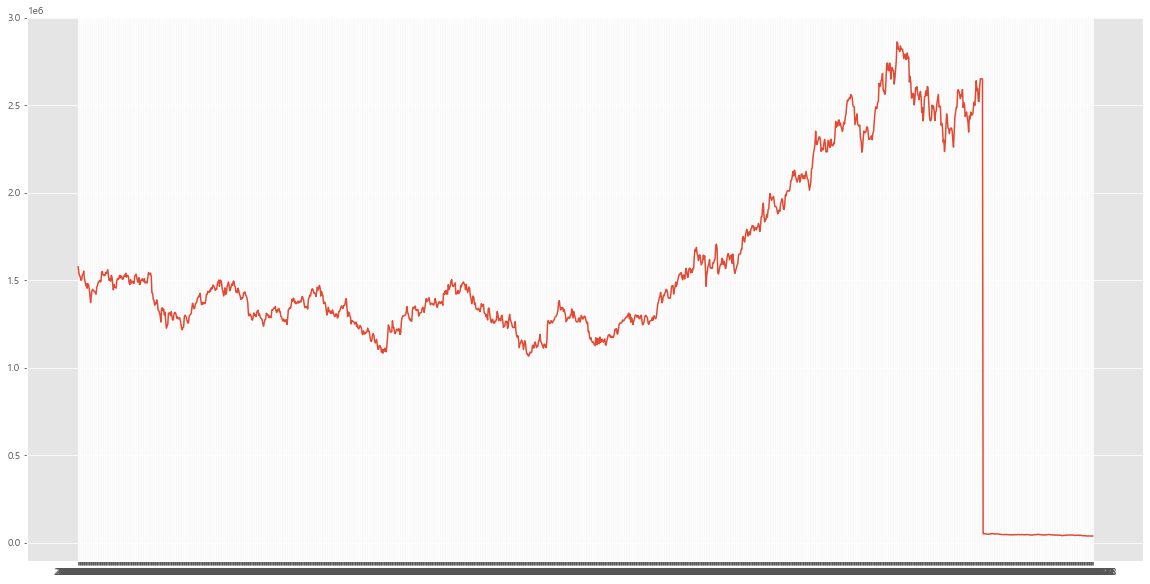

In [10]:
plt.figure(figsize=(20,10))
plt.plot(삼성전자['종가'])

In [11]:
삼성전자[삼성전자['거래량']==0]

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,
2018.04.30,2018.04.30,2650000.0,0.0,0.0,0.0,0.0,0.0
2018.05.02,2018.05.02,2650000.0,0.0,0.0,0.0,0.0,0.0
2018.05.03,2018.05.03,2650000.0,0.0,0.0,0.0,0.0,0.0


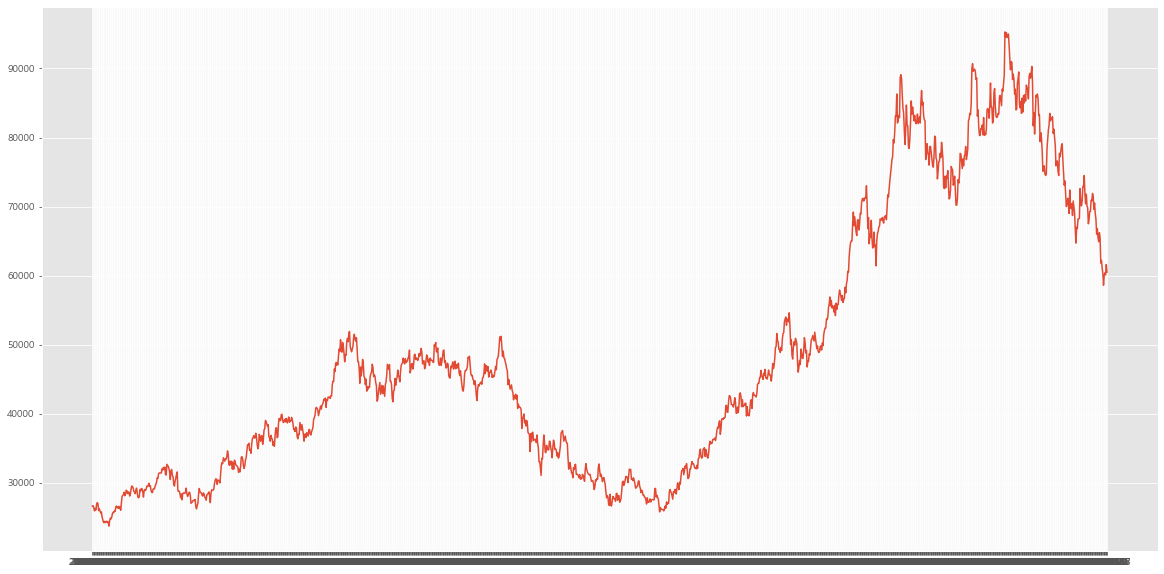

In [12]:
plt.figure(figsize=(20,10))
plt.plot(SK하이닉스['종가'])

In [13]:
SK하이닉스[SK하이닉스['거래량']==0]

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,


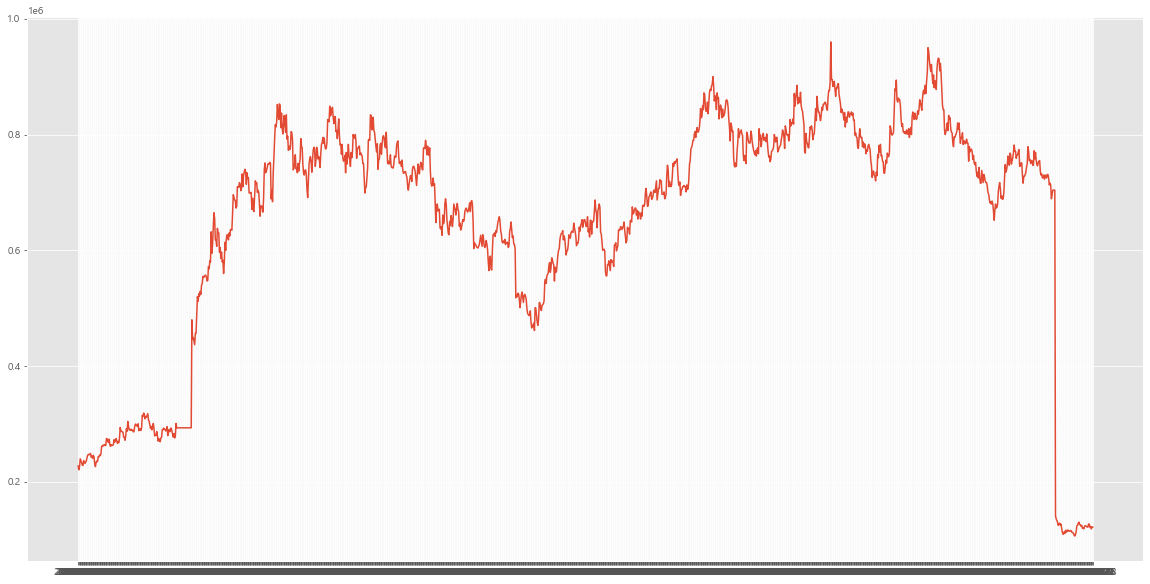

In [14]:
plt.figure(figsize=(20,10))
plt.plot(NAVER['종가'])

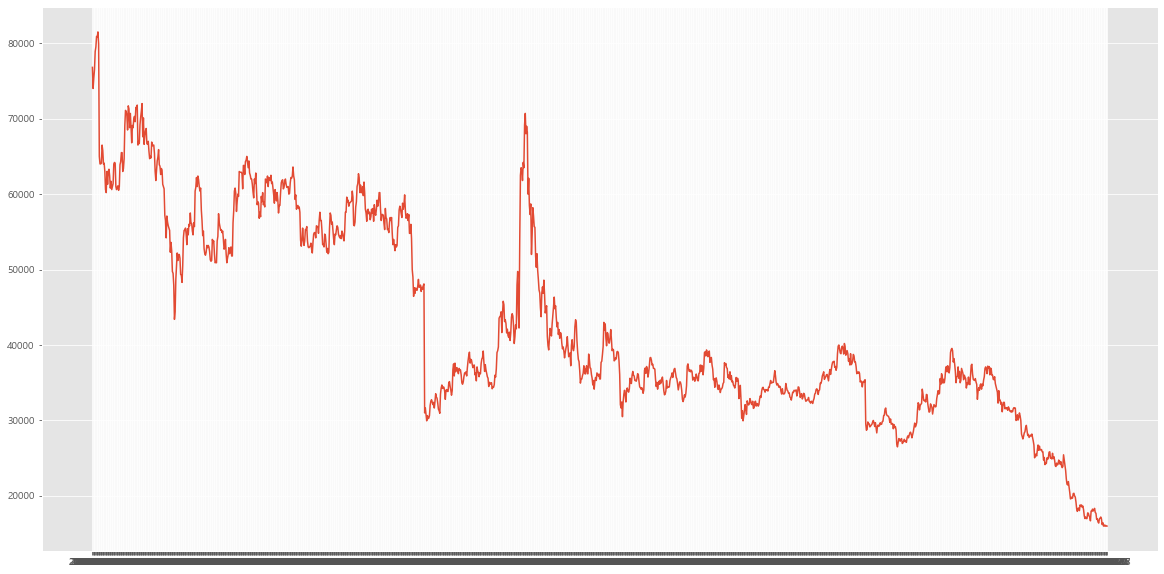

In [15]:
plt.figure(figsize=(20,10))
plt.plot(씨젠['종가'])

In [16]:
씨젠[씨젠['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,


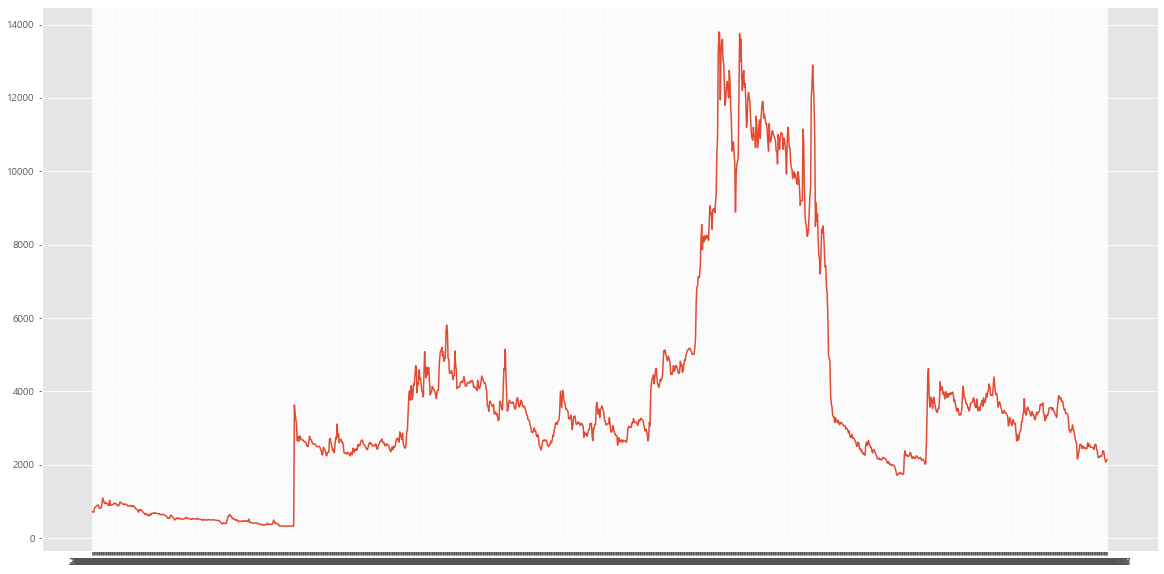

In [17]:
plt.figure(figsize=(20,10))
plt.plot(우리들휴브레인['종가'])

In [18]:
우리들휴브레인[우리들휴브레인['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2013.10.16,2013.10.16,398.0,0.0,0.0,0.0,0.0,0.0,2013.10.16
2014.02.13,2014.02.13,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.13
2014.02.14,2014.02.14,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.14
2014.02.17,2014.02.17,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.17
2014.02.18,2014.02.18,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.18
2014.02.19,2014.02.19,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.19
2014.02.20,2014.02.20,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.20
2014.02.21,2014.02.21,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.21
2014.02.24,2014.02.24,327.0,0.0,0.0,0.0,0.0,0.0,2014.02.24


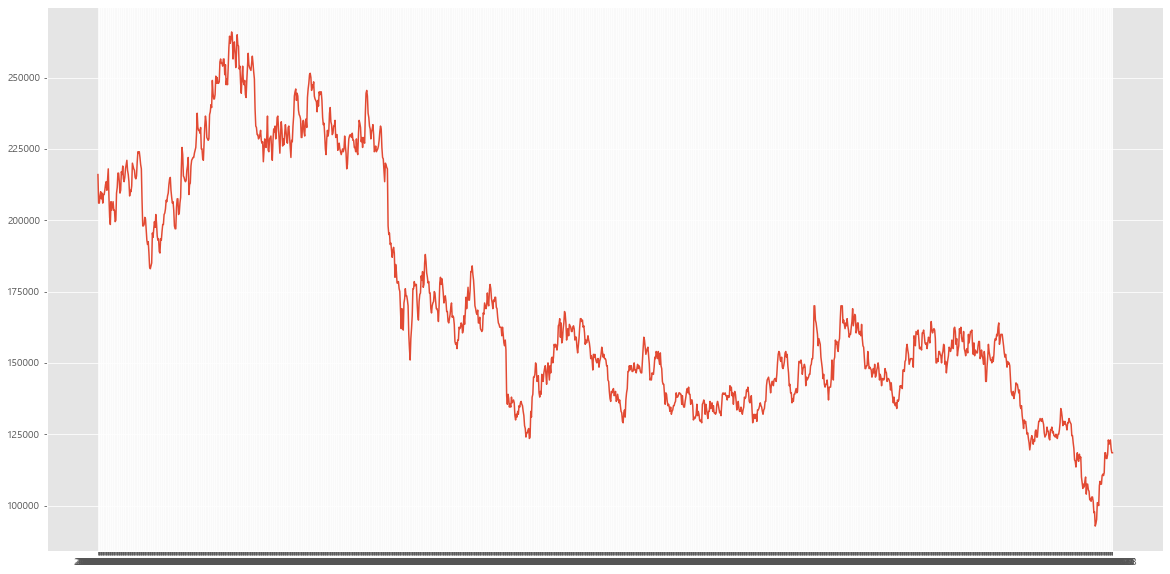

In [19]:
plt.figure(figsize=(20,10))
plt.plot(현대차['종가'])

In [20]:
현대차[현대차['거래량']==0]

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,


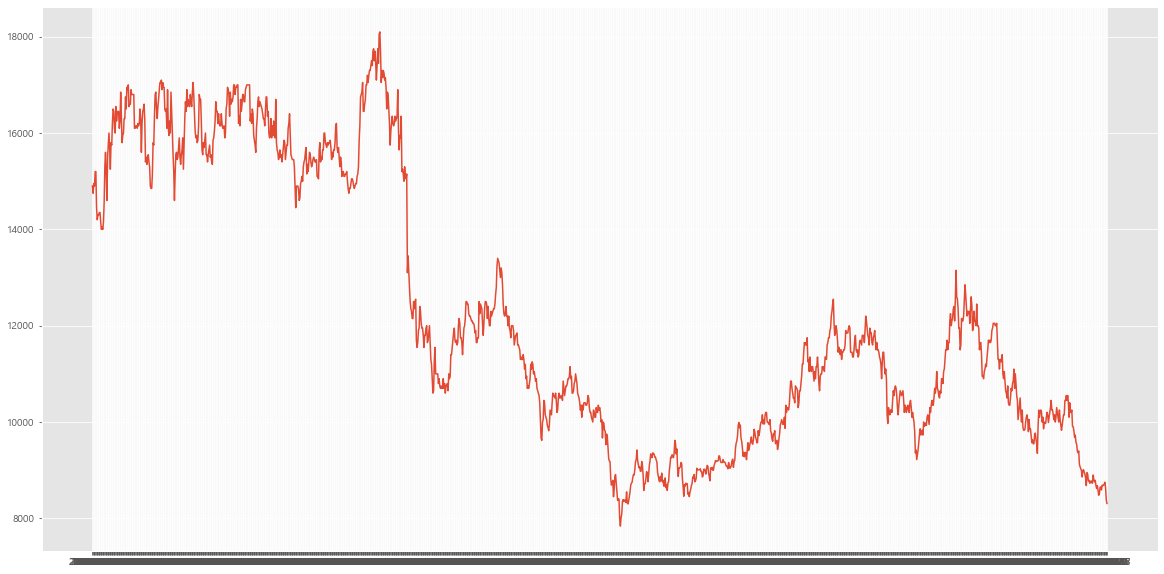

In [21]:
plt.figure(figsize=(20,10))
plt.plot(DGB금융지주['종가'])

In [22]:
DGB금융지주[DGB금융지주['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,


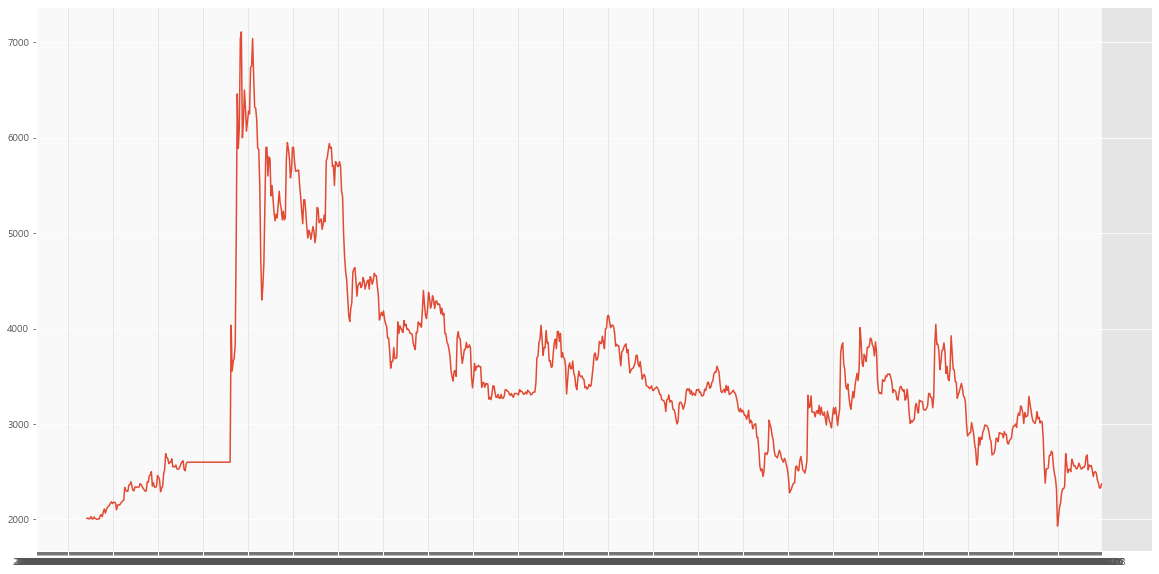

In [23]:
plt.figure(figsize=(20,10))
plt.plot(미스터블루['종가'])

In [24]:
미스터블루[미스터블루['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2015.05.13,2015.05.13,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.13
2015.05.14,2015.05.14,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.14
2015.05.15,2015.05.15,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.15
2015.05.18,2015.05.18,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.18
2015.05.19,2015.05.19,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.19
2015.05.20,2015.05.20,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.20
2015.05.21,2015.05.21,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.21
2015.05.22,2015.05.22,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.22
2015.05.26,2015.05.26,2600.0,0.0,0.0,0.0,0.0,0.0,2015.05.26


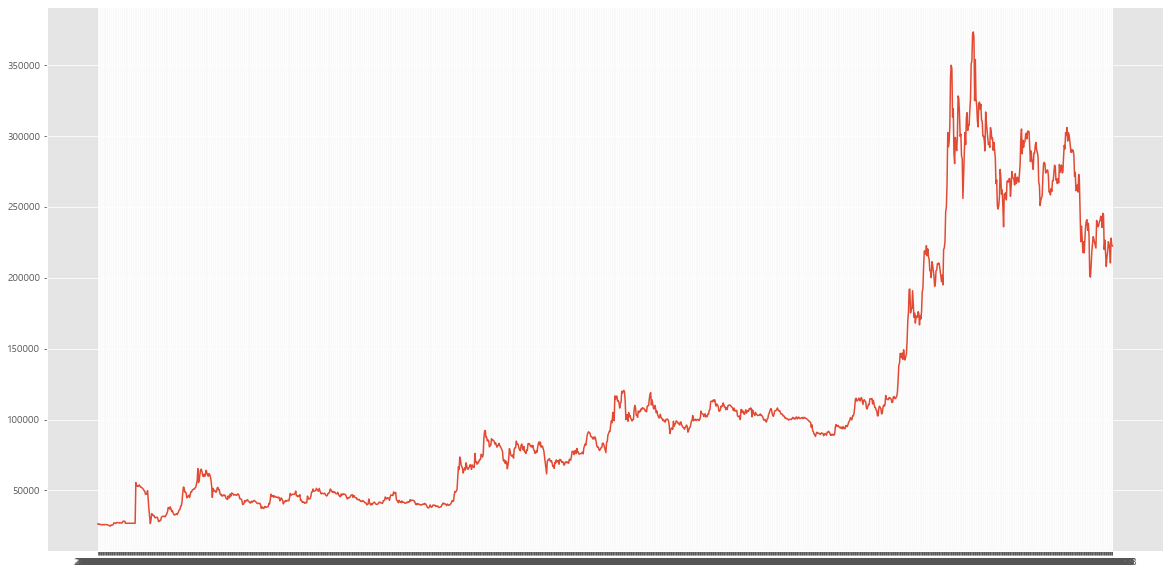

In [25]:
plt.figure(figsize=(20,10))
plt.plot(셀트리온['종가'])

In [26]:
셀트리온[셀트리온['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2013.03.04,2013.03.04,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.04
2013.03.05,2013.03.05,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.05
2013.03.06,2013.03.06,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.06
2013.03.07,2013.03.07,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.07
2013.03.08,2013.03.08,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.08
2013.03.11,2013.03.11,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.11
2013.03.12,2013.03.12,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.12
2013.03.13,2013.03.13,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.13
2013.03.14,2013.03.14,26850.0,0.0,0.0,0.0,0.0,0.0,2013.03.14


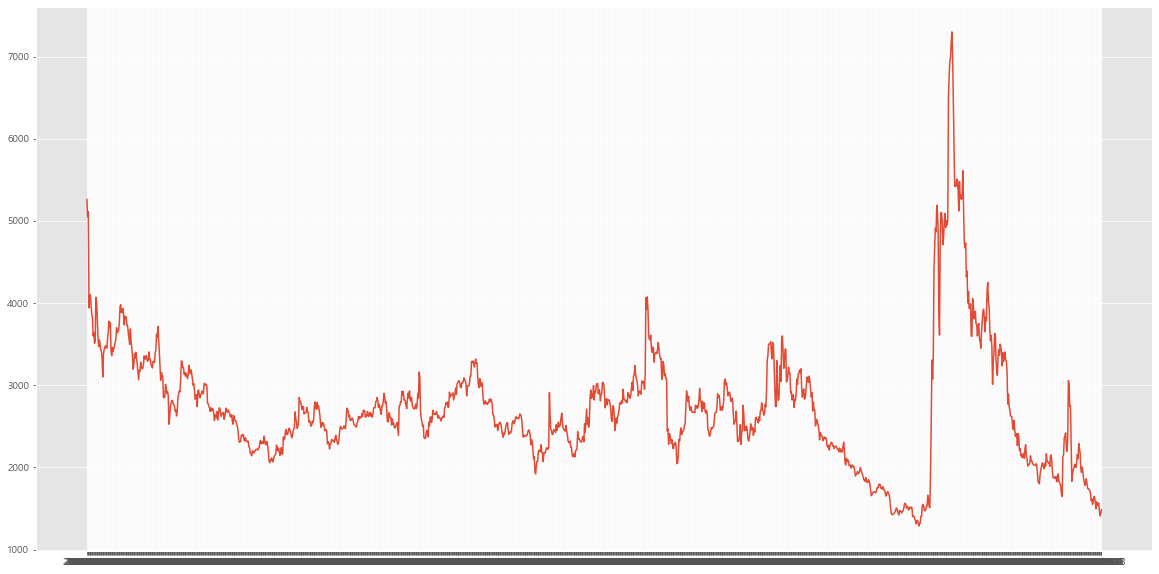

In [27]:
plt.figure(figsize=(20,10))
plt.plot(데일리블록체인['종가'])

In [28]:
데일리블록체인[데일리블록체인['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2017.02.13,2017.02.13,3440.0,0.0,0.0,0.0,0.0,0.0,2017.02.13
2017.02.21,2017.02.21,3150.0,0.0,0.0,0.0,0.0,0.0,2017.02.21
2018.01.17,2018.01.17,5100.0,0.0,0.0,0.0,0.0,0.0,2018.01.17


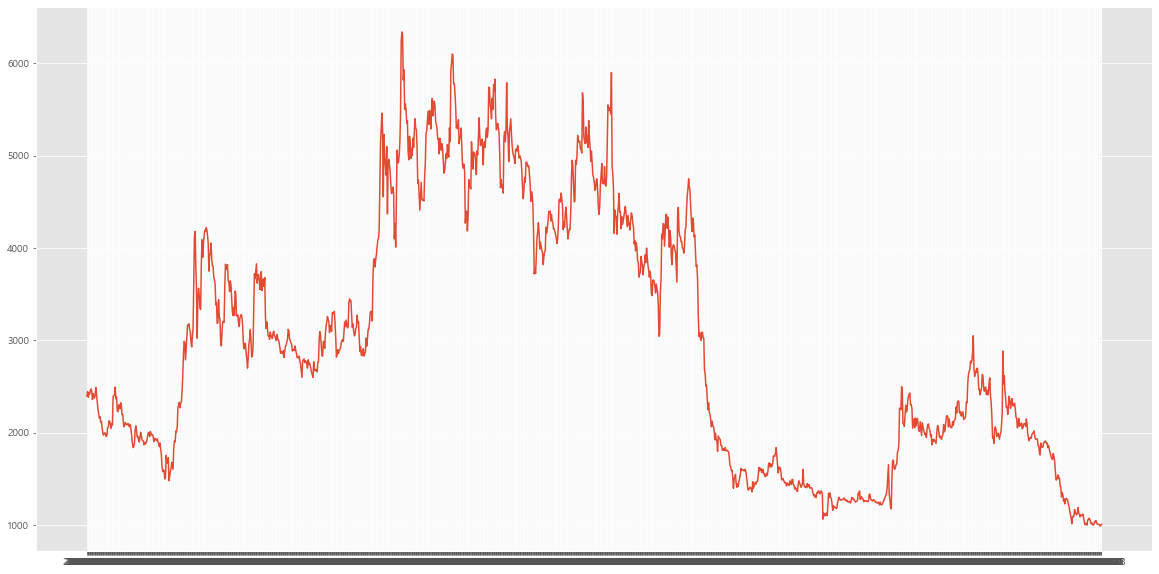

In [29]:
plt.figure(figsize=(20,10))
plt.plot(소리바다['종가'])

In [30]:
소리바다[소리바다['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2016.08.19,2016.08.19,3025.0,0.0,0.0,0.0,0.0,0.0,2016.08.19
2016.09.20,2016.09.20,1920.0,0.0,0.0,0.0,0.0,0.0,2016.09.20


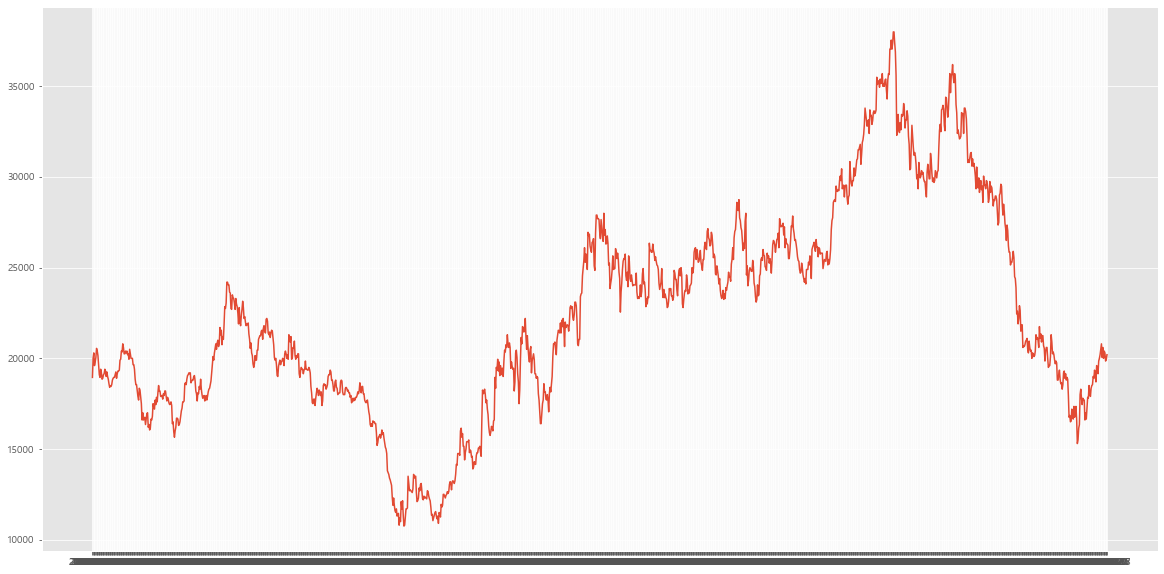

In [31]:
plt.figure(figsize=(20,10))
plt.plot(한화솔루션['종가'])

In [32]:
한화솔루션[한화솔루션['거래량']==0]

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,


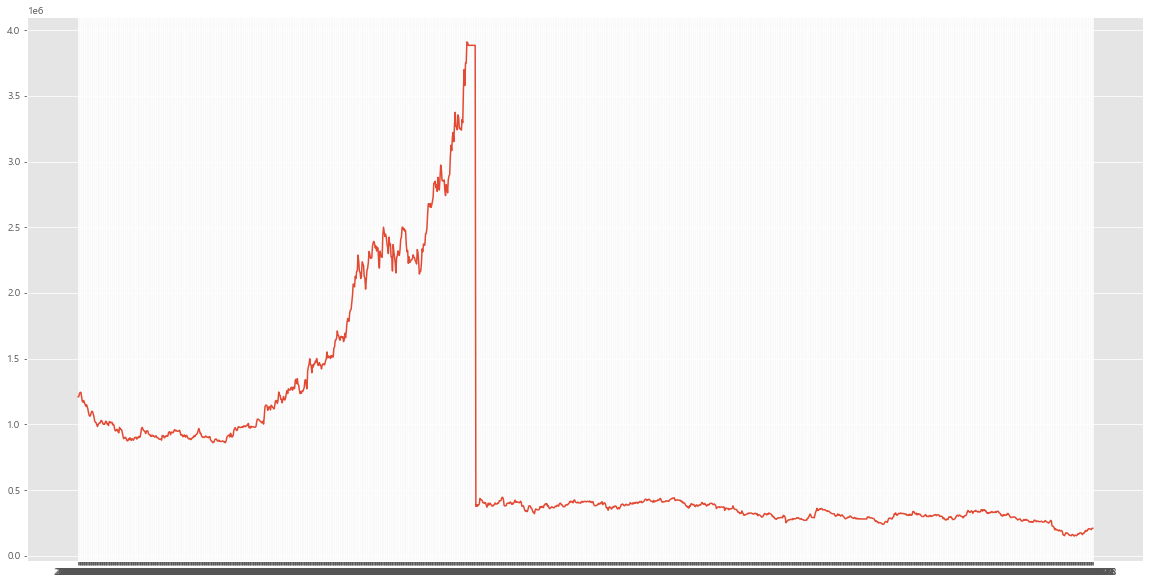

In [33]:
plt.figure(figsize=(20,10))
plt.plot(아모레퍼시픽['종가'])

In [34]:
아모레퍼시픽[아모레퍼시픽['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,
2015.04.22,2015.04.22,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.22
2015.04.23,2015.04.23,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.23
2015.04.24,2015.04.24,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.24
2015.04.27,2015.04.27,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.27
2015.04.28,2015.04.28,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.28
2015.04.29,2015.04.29,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.29
2015.04.30,2015.04.30,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.04.30
2015.05.04,2015.05.04,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.05.04
2015.05.06,2015.05.06,3884000.0,0.0,0.0,0.0,0.0,0.0,2015.05.06


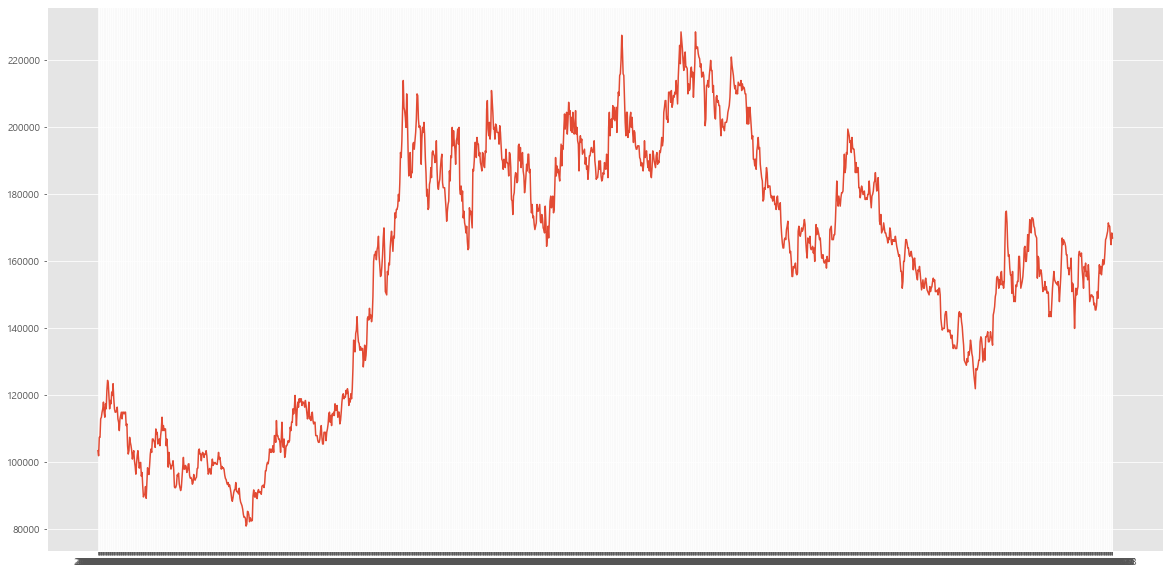

In [35]:
plt.figure(figsize=(20,10))
plt.plot(CJ대한통운['종가'])

In [36]:
CJ대한통운[CJ대한통운['거래량']==0]

,날짜_x,종가,전일비,시가,고가,저가,거래량,날짜_y
날짜,,,,,,,,


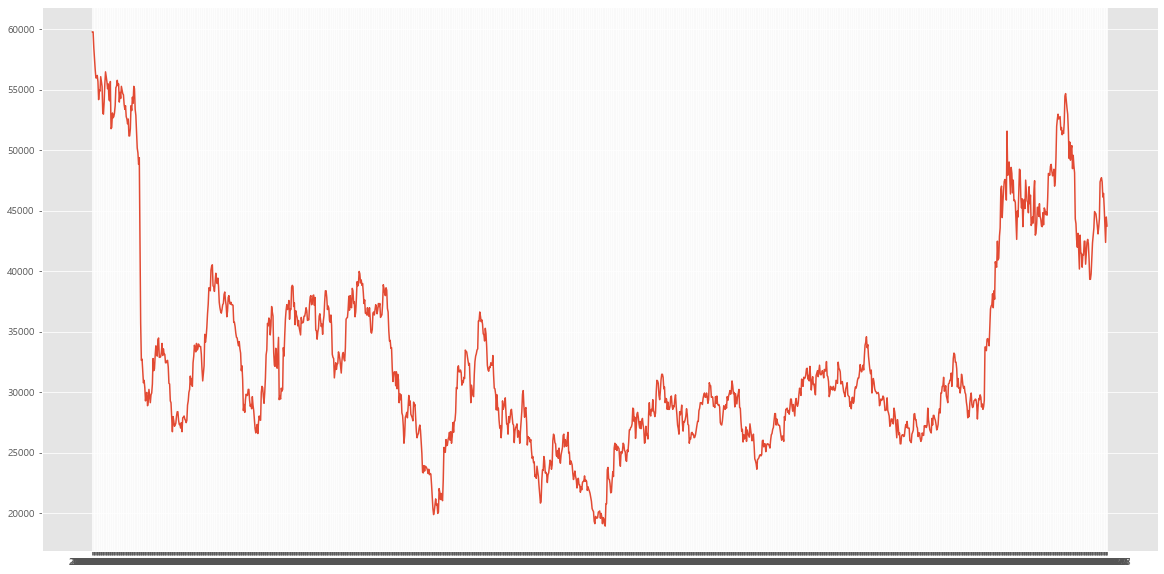

In [37]:
plt.figure(figsize=(20,10))
plt.plot(GS건설['종가'])

In [38]:
GS건설[GS건설['거래량']==0]

,날짜,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,,
